In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image, ImageDraw, ImageTk 
import tkinter as tk
import random

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.16.1


In [3]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [4]:
# MNIST dataset.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of x_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


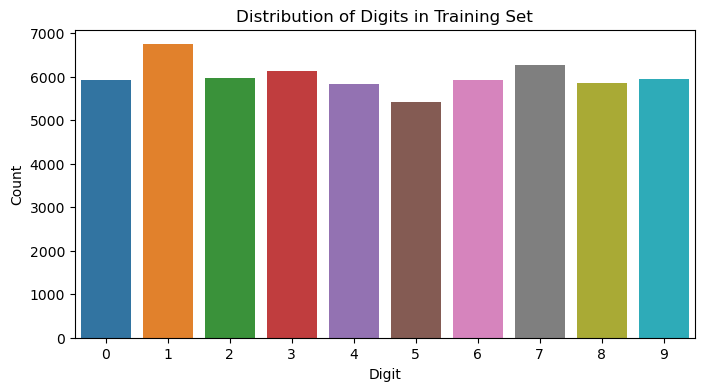

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x=np.argmax(y_train, axis=1))
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

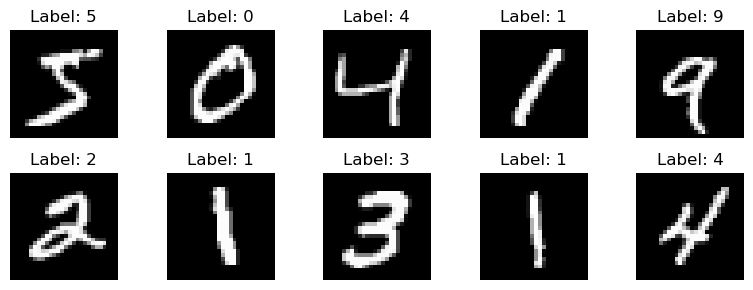

In [6]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.25),

    layers.Flatten(), 
    layers.Dense(512, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax') 
])

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
epochs = 5
print(f"\nTraining the model for {epochs} epochs...")
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
print("Training finished.")


Training the model for 5 epochs...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 50ms/step - accuracy: 0.9179 - loss: 0.2788 - val_accuracy: 0.9864 - val_loss: 0.0393
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9791 - loss: 0.0704 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9828 - loss: 0.0560 - val_accuracy: 0.9862 - val_loss: 0.0423
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9852 - loss: 0.0493 - val_accuracy: 0.9910 - val_loss: 0.0248
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9880 - loss: 0.0412 - val_accuracy: 0.9900 - val_loss: 0.0288
Training finished.


In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(x_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)


Test Loss: 0.0288
Test Accuracy: 0.9900
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



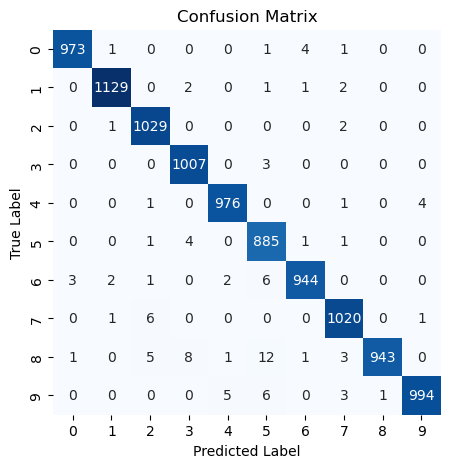

In [11]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [12]:
model_filename = "digit_recognizer_peak_performance.keras"
print(f"\nSaving model to {model_filename}...")
# The .keras format is generally preferred over .h5 now
model.save(model_filename)
print("Model saved.")


Saving model to digit_recognizer_peak_performance.keras...
Model saved.


In [13]:
# Load the model back.
print(f"Loading model from {model_filename}...")
loaded_model = load_model(model_filename) 
print("Model loaded.")

Loading model from digit_recognizer_peak_performance.keras...
Model loaded.


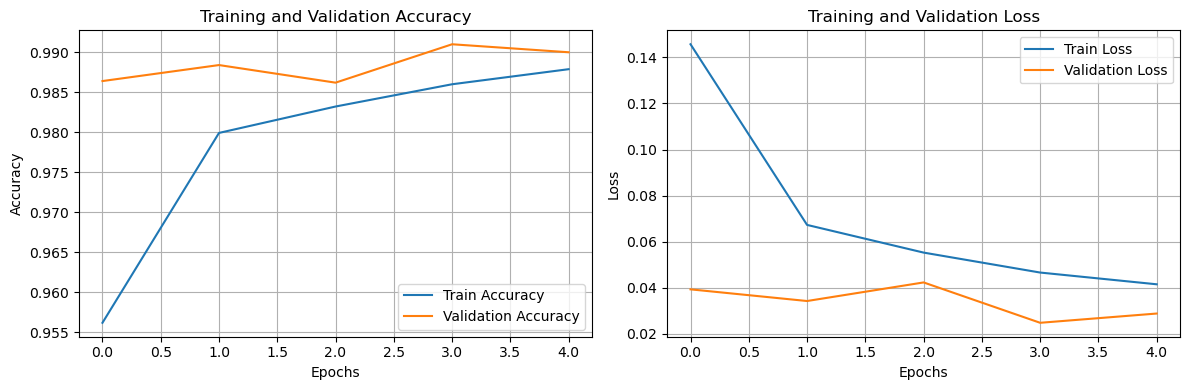

In [14]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


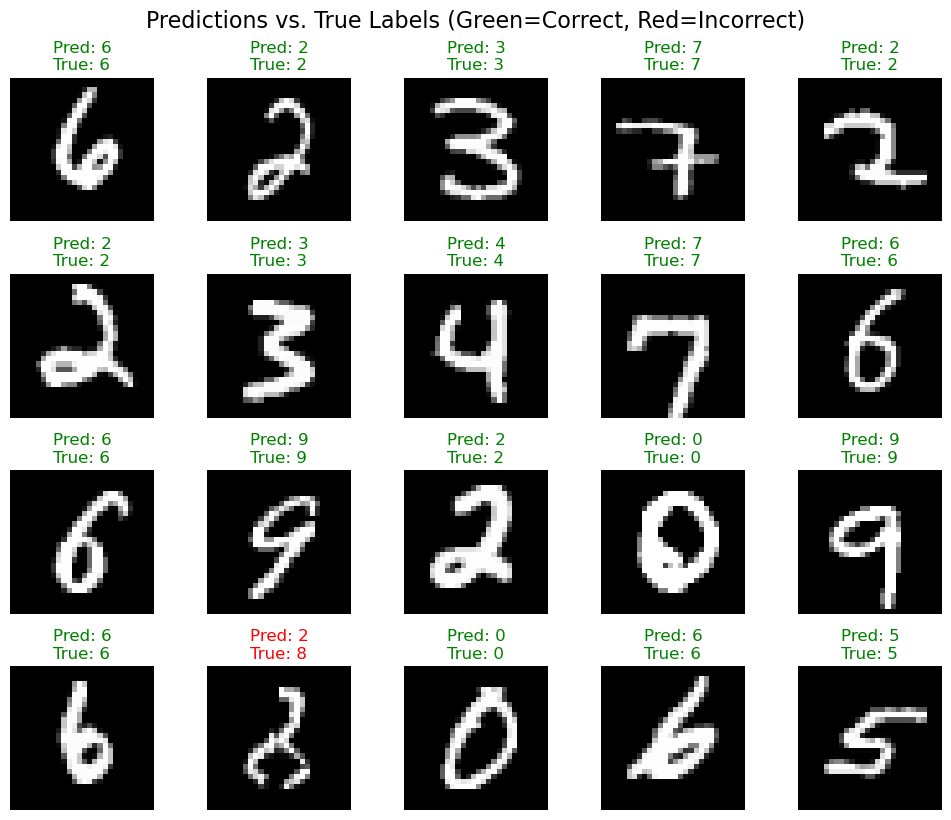

In [15]:
def visualize_predictions(model_to_use, num_examples=20):
    """Visualizes random test images with their predicted and true labels."""
    fig, axes = plt.subplots(4, 5, figsize=(10, 8))
    axes = axes.flatten()

    indices = np.random.choice(len(x_test), num_examples, replace=False)

    predictions = model_to_use.predict(x_test[indices], verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test[indices], axis=1)

    for i in range(num_examples):
        ax = axes[i]
        img = x_test[indices[i]].reshape(28, 28)
        ax.imshow(img, cmap='gray')

        predicted = predicted_labels[i]
        true = true_labels[i]

        title_color = "green" if predicted == true else "red"
        ax.set_title(f"Pred: {predicted}\nTrue: {true}", color=title_color)
        ax.axis('off')

    plt.tight_layout()
    plt.suptitle("Predictions vs. True Labels (Green=Correct, Red=Incorrect)", y=1.02, fontsize=16)
    plt.show()

visualize_predictions(loaded_model)


In [16]:
def preprocess_drawn_image(image):
    """Preprocesses a PIL Image object for the model."""
    image_resized = image.resize((28, 28))
    image_array = np.array(image_resized)
    image_array = 255 - image_array
    image_array = np.clip(image_array, 0, 255)
    threshold = 40
    image_array[image_array < threshold] = 0
    max_value = np.max(image_array)
    if max_value > 0:
        image_array = image_array / max_value
    else:
        image_array = image_array * 0
    image_array = image_array.astype('float32')
    image_input = np.expand_dims(image_array, axis=(0, -1))
    return image_input, image_array

def predict_digit_enhanced(image, model_to_use):
    """Preprocesses a drawn image, predicts the digit, and returns processed image."""
    if model_to_use is None:
        dummy_processed_array = np.zeros((28, 28), dtype=np.float32)
        return -1, np.zeros(10, dtype=np.float32), dummy_processed_array
    try:
        image_input, processed_image_array = preprocess_drawn_image(image)
        prediction = model_to_use.predict(image_input, verbose=0)
        predicted_digit = np.argmax(prediction)
        return predicted_digit, prediction[0], processed_image_array
    except Exception as e:
        print(f"Prediction error: {e}")
        dummy_processed_array = np.zeros((28, 28), dtype=np.float32)
        return -1, np.zeros(10, dtype=np.float32), dummy_processed_array


def draw_digit_app_enhanced(model_to_use):
    """Launches the enhanced Tkinter application with mobile-like layout."""
    root = tk.Tk()
    root.title("Draw a Digit")
    root.geometry("320x600")

    main_frame = tk.Frame(root, padx=5, pady=5)
    main_frame.pack(expand=True, fill=tk.BOTH)

    canvas_frame = tk.LabelFrame(main_frame, text="Draw Here", padx=5, pady=5)
    canvas_frame.pack(side=tk.TOP, fill=tk.X, pady=(0, 5))

    canvas_width = 250
    canvas_height = 350
    canvas = tk.Canvas(canvas_frame, width=canvas_width, height=canvas_height, bg='white')
    canvas.pack(expand=True, fill=tk.BOTH)

    image = Image.new('L', (canvas_width, canvas_height), 255)
    draw = ImageDraw.Draw(image)

    def paint(event):
        """Handles drawing on the canvas and PIL Image."""
        brush_size_val = brush_size_slider.get()
        x1, y1 = (event.x - brush_size_val // 2), (event.y - brush_size_val // 2)
        x2, y2 = (event.x + brush_size_val // 2), (event.y + brush_size_val // 2)
        canvas.create_oval(x1, y1, x2, y2, fill='black', outline='black')
        draw.ellipse([max(0, x1), max(0, y1), min(canvas_width, x2), min(canvas_height, y2)], fill=0)


    canvas.bind('<B1-Motion>', paint)

    controls_frame = tk.Frame(main_frame, pady=5)
    controls_frame.pack(side=tk.TOP, fill=tk.X)

    brush_size_frame = tk.LabelFrame(controls_frame, text="Brush Size", padx=5, pady=0)
    brush_size_frame.pack(side=tk.LEFT, fill=tk.X, expand=True, padx=(0, 5))
    brush_size_label = tk.Label(brush_size_frame, text="Size:")
    brush_size_label.pack(side=tk.LEFT)
    brush_size_slider = tk.Scale(brush_size_frame, from_=5, to=30, orient=tk.HORIZONTAL, length=80)
    brush_size_slider.set(15)
    brush_size_slider.pack(side=tk.LEFT, padx=5)

    button_frame = tk.Frame(controls_frame)
    button_frame.pack(side=tk.LEFT, fill=tk.X, expand=True)

    btn_predict = tk.Button(button_frame, text='Predict', command=lambda: predict(), font=("Georgia", 9), bg="#4CAF50", fg="white")
    btn_predict.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=2)

    btn_clear = tk.Button(button_frame, text='Clear', command=lambda: clear_canvas(), font=("Georgia", 9), bg="#f44336", fg="white")
    btn_clear.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=2)

    results_frame = tk.LabelFrame(main_frame, text="Prediction", padx=5, pady=5)
    results_frame.pack(side=tk.TOP, fill=tk.X, pady=(5, 0))

    result_label = tk.Label(results_frame, text="Predicted Digit:\nNone", font=("Georgia", 12, "bold"), justify=tk.CENTER)
    result_label.pack(pady=2)

    probability_label = tk.Label(results_frame, text="", font=("Georgia", 7), fg="darkgray", justify=tk.CENTER, wraplength=250)
    probability_label.pack()

    processed_img_frame = tk.LabelFrame(main_frame, text="Model Input (28x28)", padx=5, pady=5)
    processed_img_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True, pady=5)

    display_img_size = 80
    processed_img_label = tk.Label(processed_img_frame, bg='lightgray', width=display_img_size, height=display_img_size)
    processed_img_label.pack(expand=True)
    processed_img_label.image_tk = None

    def predict():
        """Gets the drawing, preprocesses, predicts, and updates the labels and image view."""
        if model_to_use is None:
            result_label.config(text="Error: Model Not Loaded", fg="red")
            probability_label.config(text="Please load the model first.", fg="red")
            processed_img_label.config(image='')
            processed_img_label.image_tk = None
            return

        print("Attempting prediction...")

        predicted_digit, probabilities, processed_image_array = predict_digit_enhanced(image, model_to_use)

        print(f"predict_digit_enhanced returned: digit={predicted_digit}, probabilities shape={probabilities.shape if probabilities is not None else 'None'}, processed_image_array shape={processed_image_array.shape if processed_image_array is not None else 'None'}")
        print(f"Processed image min value: {np.min(processed_image_array) if processed_image_array is not None else 'N/A'}, max value: {np.max(processed_image_array) if processed_image_array is not None else 'N/A'}")


        if predicted_digit == -1:
            result_label.config(text="Prediction Failed", fg="red")
            probability_label.config(text="Check model loading/prediction.", fg="red")
            processed_img_label.config(image='')
            processed_img_label.image_tk = None
            return

        result_label.config(text=f"Predicted Digit:\n{predicted_digit}", fg="blue")

        top_n = 3
        top_indices = np.argsort(probabilities)[::-1][:top_n]
        prob_text = "Top " + str(top_n) + ": "
        for i in top_indices:
            prob_text += f"{i}: {probabilities[i]*100:.1f}% "
        probability_label.config(text=prob_text.strip(), fg="darkgray")

        print("Processing image for display...")

        display_image_array = (processed_image_array * 255).astype(np.uint8)


        print(f"Display image array shape: {display_image_array.shape}")
        center_y, center_x = display_image_array.shape[0] // 2, display_image_array.shape[1] // 2
        slice_size = 4 # Size of the slice on each side from the center
        y_slice = slice(max(0, center_y - slice_size), min(display_image_array.shape[0], center_y + slice_size))
        x_slice = slice(max(0, center_x - slice_size), min(display_image_array.shape[1], center_x + slice_size))

        print(f"Slice of display image array ({y_slice}, {x_slice}):")
        print(display_image_array[y_slice, x_slice])


        display_image_pil = Image.fromarray(display_image_array, mode='L')
        display_img_size = 80
        display_image_pil = display_image_pil.resize((display_img_size, display_img_size), Image.Resampling.NEAREST)
        img_tk = ImageTk.PhotoImage(image=display_image_pil)

        print("Updating image label...")
        processed_img_label.config(image=img_tk)
        processed_img_label.image_tk = img_tk


    def clear_canvas():
        """Clears the drawing canvas and resets the labels and image view."""
        canvas.delete("all")
        draw.rectangle([0, 0, canvas_width, canvas_height], fill=255)
        result_label.config(text="Predicted Digit:\nNone", fg="black")
        probability_label.config(text="", fg="black")
        processed_img_label.config(image='')
        processed_img_label.image_tk = None

    root.mainloop()


# Model Loading
model_filename = "digit_recognizer_peak_performance.keras"
loaded_model = None

try:
    print(f"Loading model from {model_filename}...")
    loaded_model = load_model(model_filename)
    print("Model loaded.")
except Exception as e:
    print(f"Error loading model '{model_filename}': {e}")
    print("The application will run, but prediction will not work.")

# Run the app
draw_digit_app_enhanced(loaded_model)

Loading model from digit_recognizer_peak_performance.keras...
Model loaded.
Attempting prediction...
predict_digit_enhanced returned: digit=9, probabilities shape=(10,), processed_image_array shape=(28, 28)
Processed image min value: 0.0, max value: 1.0
Processing image for display...
Display image array shape: (28, 28)
Slice of display image array (slice(10, 18, None), slice(10, 18, None)):
[[  0 141 255 195 217 254 203  79]
 [  0 152 253  47   0  63 195 255]
 [  0 227 214   0   0   0   0 198]
 [ 44 255 150   0   0   0   0 206]
 [  0 246 203   0   0  87 215 252]
 [  0 111 252 232 240 245 181  60]
 [  0   0  54  87  79   0   0   0]
 [  0   0   0   0   0   0   0   0]]
Updating image label...
Attempting prediction...
predict_digit_enhanced returned: digit=8, probabilities shape=(10,), processed_image_array shape=(28, 28)
Processed image min value: 0.0, max value: 1.0
Processing image for display...
Display image array shape: (28, 28)
Slice of display image array (slice(10, 18, None), sli